In [1]:
def convert_gender(gender):
    if gender == 'nm':
        return 'm'
    elif gender == 'nf':
        return 'f'
    return gender

def update_dict(d, key, row):
    empty = [0 for _ in row]
    d[key] = (
        int(row[0]) + d.get(key, empty)[0],
        int(row[1]) + d.get(key, empty)[1]
    )

In [13]:
hab_control = dict()
exp_control = dict()
hab_treatment = dict()
exp_treatment = dict()

with open('complete_output_data-dear_enemy-1.csv','r') as f:
    import csv
    reader = csv.reader(f)
    for row in reader:
        # skip header
        if row[0] == 'tank_num':
            continue

        gender = convert_gender(row[7].strip())
        phase = row[5].strip()
        cond = row[6].strip()
        pair_id = int(row[3])
        try:
            key = (pair_id, gender)
            if phase == 'habituation':
                if cond == 'control':
                    update_dict(hab_control, key, row[8:10])
                elif cond == 'treatment':
                    update_dict(hab_treatment, key, row[8:10])
                else:
                    assert False
            elif phase == 'experiment':
                if cond == 'control':
                    update_dict(exp_control, key, row[8:10])
                elif cond == 'treatment':
                    update_dict(exp_treatment, key, row[8:10])
                else:
                    assert False
            else:
                assert False
        except ValueError:
            pass

In [14]:
from scipy import stats
import numpy

hab_control_i_values = numpy.array([v[0] for v in hab_control.values()])
exp_control_i_values = numpy.array([v[0] for v in exp_control.values()])
hab_treatment_i_values = numpy.array([v[0] for v in hab_treatment.values()])
exp_treatment_i_values = numpy.array([v[0] for v in exp_treatment.values()])

hab_control_n_values = numpy.array([v[1] for v in hab_control.values()])
exp_control_n_values = numpy.array([v[1] for v in exp_control.values()])
hab_treatment_n_values = numpy.array([v[1] for v in hab_treatment.values()])
exp_treatment_n_values = numpy.array([v[1] for v in exp_treatment.values()])
# How to do a t-test
# stats.ttest_rel(hab_control_values, exp_control_values)

In [15]:
from matplotlib.pyplot import hist

(array([ 5., 12., 16.,  8.,  3.,  5.,  9.,  4.,  2.,  5.,  3.,  2.,  2.,
         1.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([  5. ,  12.8,  20.6,  28.4,  36.2,  44. ,  51.8,  59.6,  67.4,
         75.2,  83. ,  90.8,  98.6, 106.4, 114.2, 122. , 129.8, 137.6,
        145.4, 153.2, 161. ]),
 <a list of 1 Patch objects>)

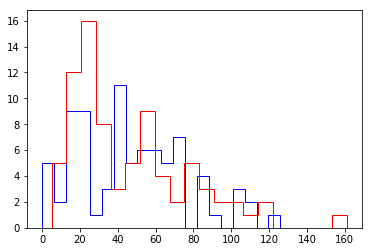

In [17]:
hist(hab_control_i_values,bins=20,histtype='step',color='blue')
hist(exp_control_i_values,bins=20,histtype='step',color='red')

(array([ 7.,  7., 10.,  5.,  8., 13.,  1.,  6.,  5.,  2.,  4.,  4.,  1.,
         3.,  1.,  0.,  0.,  2.,  0.,  1.]),
 array([  0. ,   6.8,  13.6,  20.4,  27.2,  34. ,  40.8,  47.6,  54.4,
         61.2,  68. ,  74.8,  81.6,  88.4,  95.2, 102. , 108.8, 115.6,
        122.4, 129.2, 136. ]),
 <a list of 1 Patch objects>)

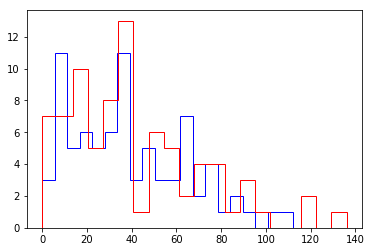

In [18]:
hist(hab_treatment_i_values,bins=20,histtype='step',color='blue')
hist(exp_treatment_i_values,bins=20,histtype='step',color='red')

(array([57.,  8.,  2.,  3.,  1.,  3.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  3.95,  7.9 , 11.85, 15.8 , 19.75, 23.7 , 27.65, 31.6 ,
        35.55, 39.5 , 43.45, 47.4 , 51.35, 55.3 , 59.25, 63.2 , 67.15,
        71.1 , 75.05, 79.  ]),
 <a list of 1 Patch objects>)

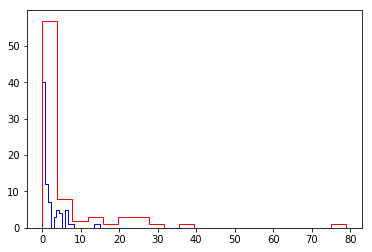

In [19]:
hist(hab_control_n_values,bins=20,histtype='step',color='blue')
hist(exp_control_n_values,bins=20,histtype='step',color='red')

(array([57.,  8.,  2.,  3.,  1.,  3.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  3.95,  7.9 , 11.85, 15.8 , 19.75, 23.7 , 27.65, 31.6 ,
        35.55, 39.5 , 43.45, 47.4 , 51.35, 55.3 , 59.25, 63.2 , 67.15,
        71.1 , 75.05, 79.  ]),
 <a list of 1 Patch objects>)

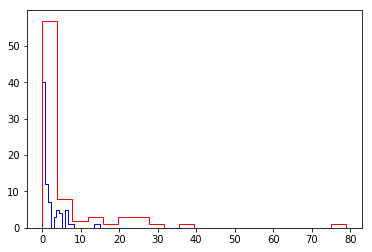

In [20]:
hist(hab_control_n_values,bins=20,histtype='step',color='blue')
hist(exp_control_n_values,bins=20,histtype='step',color='red')

### Control tests — Intruder

In [21]:
print(stats.kstest(hab_control_i_values, 'norm'))
print(stats.kstest(exp_control_i_values, 'norm'))
print(stats.wilcoxon(hab_control_i_values, exp_control_i_values))

KstestResult(statistic=0.9522498680518208, pvalue=0.0)
KstestResult(statistic=0.9999997133484281, pvalue=0.0)
WilcoxonResult(statistic=1501.5, pvalue=0.8459589500483795)


### Treatment tests — Intruder

In [22]:
print(stats.kstest(hab_treatment_i_values, 'norm'))
print(stats.kstest(exp_treatment_i_values, 'norm'))
print(stats.wilcoxon(hab_treatment_i_values, exp_treatment_i_values))

KstestResult(statistic=0.9624999990134123, pvalue=0.0)
KstestResult(statistic=0.9522498680518208, pvalue=0.0)
WilcoxonResult(statistic=1603.0, pvalue=0.9350089341119524)


### Control tests — Neighbour


In [23]:
print(stats.kstest(hab_control_n_values, 'norm'))
print(stats.kstest(exp_control_n_values, 'norm'))
print(stats.wilcoxon(hab_control_n_values, exp_control_n_values))

KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
WilcoxonResult(statistic=547.5, pvalue=0.040584645015251185)


### Treatment tests — Neighbour

In [24]:
print(stats.kstest(hab_treatment_n_values, 'norm'))
print(stats.kstest(exp_treatment_n_values, 'norm'))
print(stats.wilcoxon(hab_treatment_n_values, exp_treatment_n_values))

KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
WilcoxonResult(statistic=337.5, pvalue=0.0001653740325069067)
